In [1]:
import os
import re
import numpy as np 
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import pearsonr
from pyaml_env import parse_config, BaseConfig
from my_utils.neural_data import get_tripleN_reliability
from my_utils.alignment_metrics import partial_correlation
from my_utils.model_helpers import init_vgg, get_layer_names, get_nice_layer_names

## Random Sparse Features

In [28]:
sparsified_layers="all"
random_predictivity_path = f'./expt_results/random_features/{sparsified_layers}_layers/predictivity'
inits = ['kaiming_n', 'trained']
result_files =  os.listdir(f"{random_predictivity_path}/")

pattern = re.compile(r"sparsity_(\d+\.\d+)")
sparsity_values = sorted({float(pattern.search(f).group(1)) for f in result_files})

vgg_model = init_vgg()
vgg_layer_names = get_layer_names(vgg_model)
nice_layer_names = get_nice_layer_names(vgg_model, vgg_layer_names)

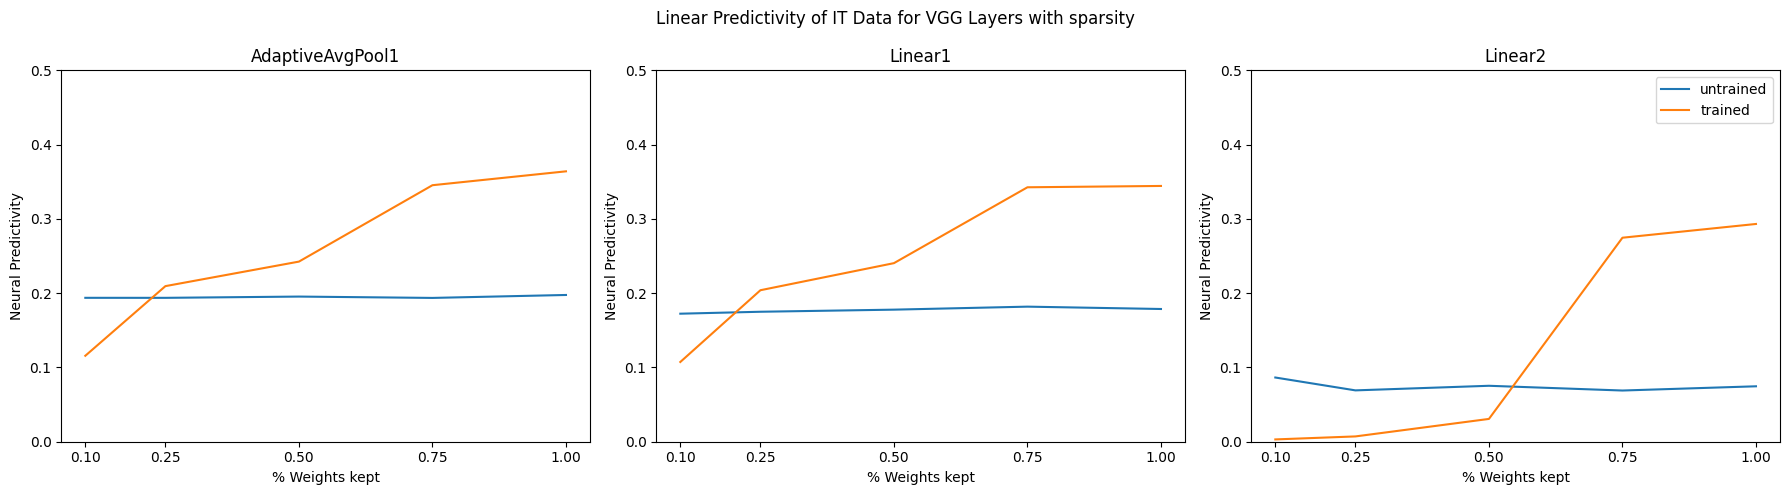

In [29]:
# Predictivity of last n layers across different sparsities
last_n_layers = 3
layers_to_plot = vgg_layer_names[len(vgg_layer_names)-last_n_layers:]

fig = plt.figure(figsize=(18,5))
for li, ln in enumerate(layers_to_plot):
    layer_ind = len(vgg_layer_names)-last_n_layers+li
    plt.subplot(1,last_n_layers,li+1)
    plt.title(nice_layer_names[layer_ind])
    for _, rn in enumerate(inits):
        y_vals = []
        x_vals = []
        if rn == "trained":
            line_color = "tab:orange"
        else:
            line_color = "tab:blue"
        for ki, k in enumerate(sparsity_values):

            pred_data = pd.read_csv(f'{random_predictivity_path}/{rn}_sparsity_{k:.2f}.csv', index_col=0).to_numpy() # (n_seeds, n_layers)
            y_vals.append(pred_data[0, layer_ind])
            x_vals.append(k)
            

        plt.plot(x_vals, y_vals, color=line_color, label=f"{rn if rn == "trained" else "untrained"}")
    plt.xticks(x_vals)
    plt.ylim(0, 0.5)
    plt.ylabel("Neural Predictivity")
    plt.xlabel("% Weights kept")
plt.suptitle("Linear Predictivity of IT Data for VGG Layers with sparsity")
plt.legend()
plt.tight_layout()
plt.show()

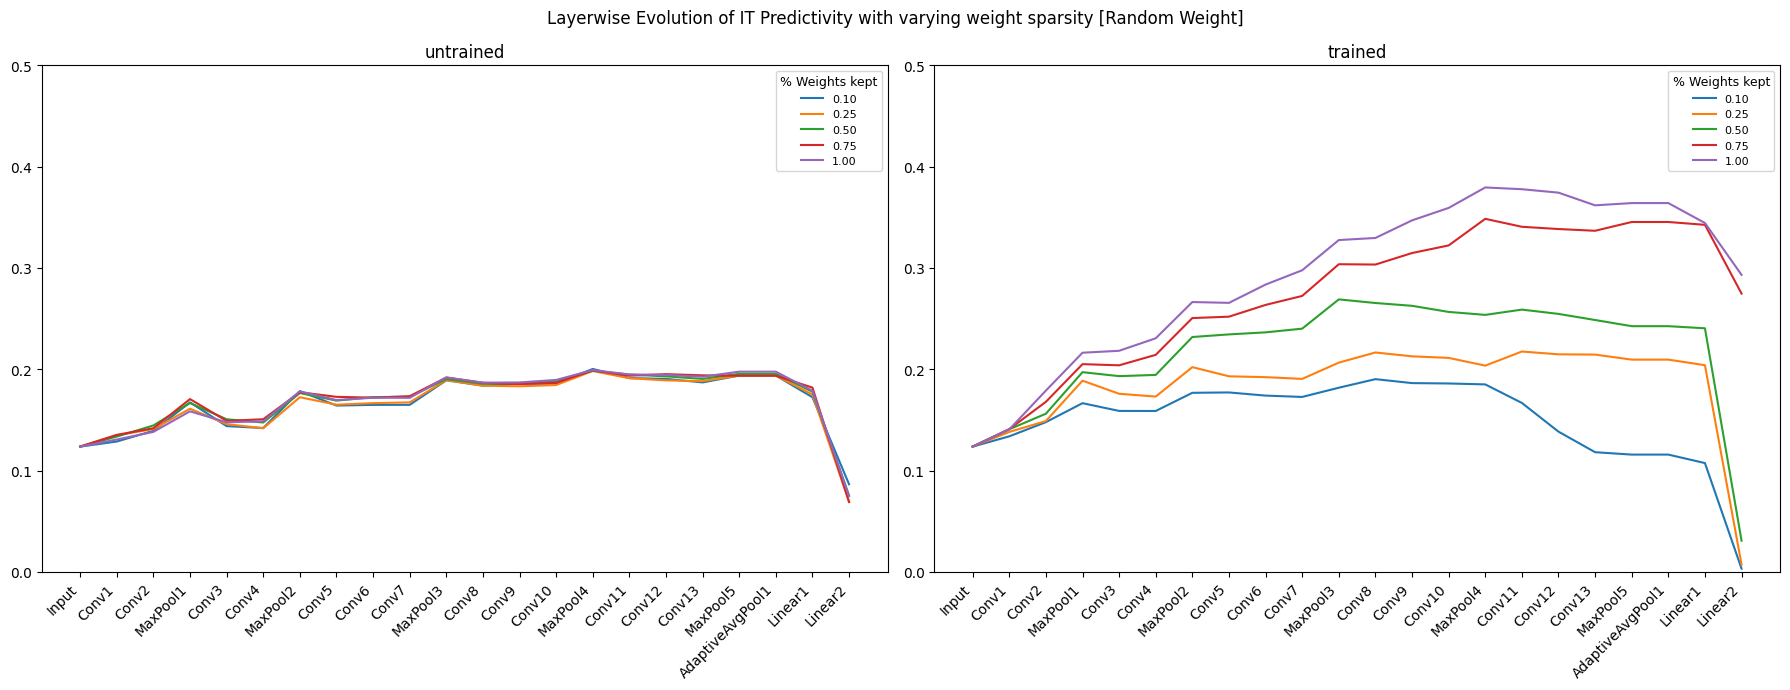

In [14]:
# Predictivity of last n layers across different sparsities

fig = plt.figure(figsize=(18,7))
for ri, rn in enumerate(inits):
    if rn == "trained":
        line_color = "tab:orange"
    else:
        line_color = "tab:blue"
    plt.subplot(1,2,ri+1)
    plt.title(f"{rn if rn == "trained" else "untrained"}")
    for ki, k in enumerate(sparsity_values):
        
        pred_data = pd.read_csv(f'{random_predictivity_path}/{rn}_sparsity_{k:.2f}.csv', index_col=0).to_numpy() # (n_seeds, n_layers)
        y_vals = pred_data[0,:]
        plt.plot(nice_layer_names, y_vals, label=f"{k:.2f}")
        plt.xticks(rotation=45, ha='right')
        plt.ylim([0, 0.5])

        plt.legend(title="% Weights kept", fontsize=8, title_fontsize=9)

plt.suptitle(f"Layerwise Evolution of IT Predictivity with varying weight sparsity [Random Weight]")
plt.tight_layout()
plt.show()

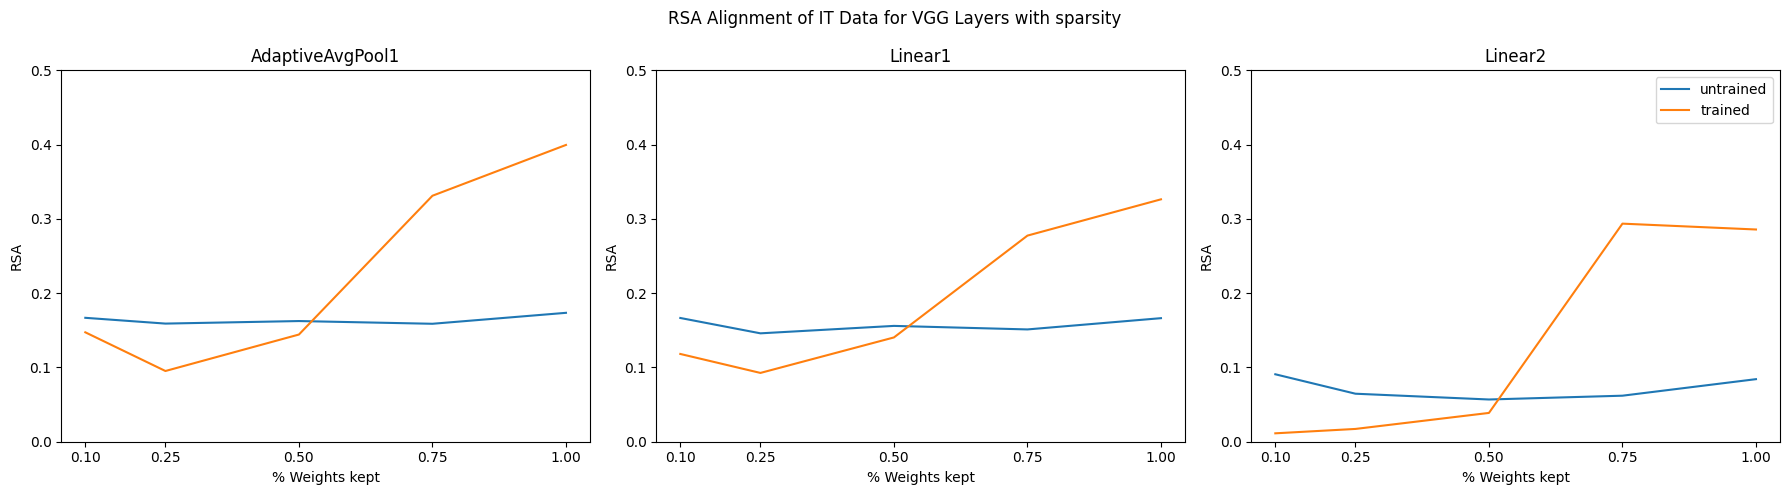

In [16]:
# RSA 
random_rsa_path = f'./expt_results/random_features/{sparsified_layers}_layers/rsa'

fig = plt.figure(figsize=(18,5))
for li, ln in enumerate(layers_to_plot):
    layer_ind = len(vgg_layer_names)-last_n_layers+li
    plt.subplot(1,last_n_layers,li+1)
    plt.title(nice_layer_names[layer_ind])
    for _, rn in enumerate(inits):
        y_vals = []
        x_vals = []
        if rn == "trained":
            line_color = "tab:orange"
        else:
            line_color = "tab:blue"
        for ki, k in enumerate(sparsity_values):

            rsa_data = pd.read_csv(f'{random_rsa_path}/{rn}_sparsity_{k:.2f}.csv', index_col=0).to_numpy() # (n_seeds, n_layers)
            y_vals.append(rsa_data[0, layer_ind])
            x_vals.append(k)
            

        plt.plot(x_vals, y_vals, color=line_color, label=f"{rn if rn == "trained" else "untrained"}")
    plt.xticks(x_vals)
    plt.ylim(0, 0.5)
    plt.ylabel("RSA")
    plt.xlabel("% Weights kept")
plt.suptitle("RSA Alignment of IT Data for VGG Layers with sparsity")
plt.legend()
plt.tight_layout()
plt.show()


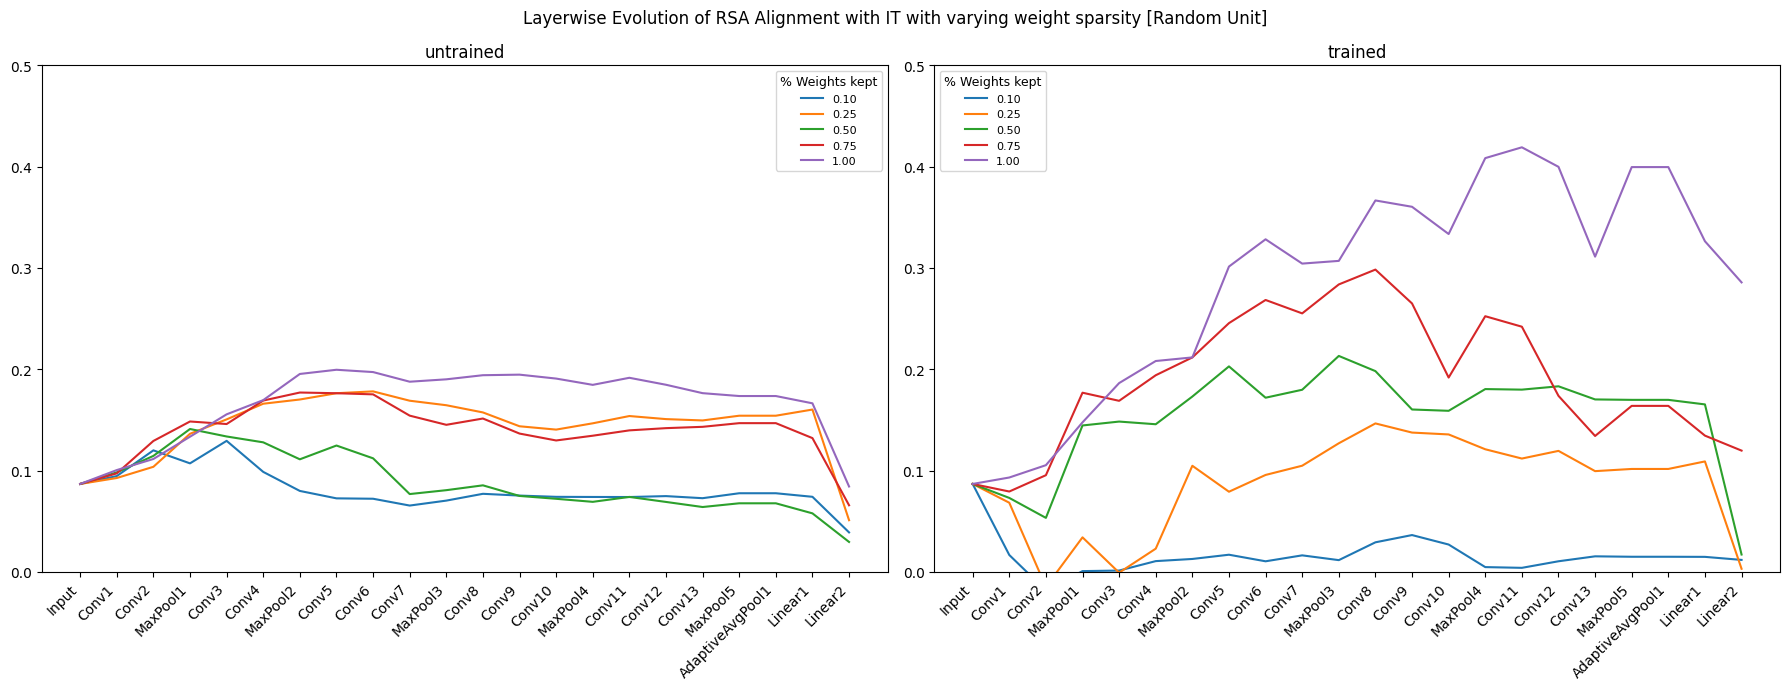

In [26]:
# RSA of last n layers across different sparsities
fig = plt.figure(figsize=(18,7))
for ri, rn in enumerate(inits):
    if rn == "trained":
        line_color = "tab:orange"
    else:
        line_color = "tab:blue"
    plt.subplot(1,2,ri+1)
    plt.title(f"{rn if rn == "trained" else "untrained"}")
    for ki, k in enumerate(sparsity_values):
        
        rsa_data = pd.read_csv(f'{random_rsa_path}/{rn}_sparsity_{k:.2f}.csv', index_col=0).to_numpy() # (n_seeds, n_layers)
        y_vals = rsa_data[0,:]
        plt.plot(nice_layer_names, y_vals, label=f"{k:.2f}")
        plt.xticks(rotation=45, ha='right')
        plt.ylim([0, 0.5])

        plt.legend(title="% Weights kept", fontsize=8, title_fontsize=9)

plt.suptitle(f"Layerwise Evolution of RSA Alignment with IT with varying weight sparsity [Random Unit]")
plt.tight_layout()
plt.show()

## Performance changes with sparsity (full models)

In [39]:
sparse_layers = ['early', 'middle', 'late', 'all']
vgg_accs = {}
sparsity_vals = []
for sl in sparse_layers:
    path = f'./expt_results/random_features/{sl}_layers/probe_performance/layer_full_model_sparsity_performance.csv'
    df = pd.read_csv(path)
    vgg_accs[sl] = []
    if sl == 'early':
        sparsity_vals = list(df.iloc[:,0])
    
    for i in range(5):
        vgg_accs[sl].append(float(df.iloc[i, 2]))
print(vgg_accs)
print(sparsity_vals)

{'early': [0.00496, 0.00692, 0.02984, 0.64878, 0.90394], 'middle': [0.00466, 0.0126, 0.63034, 0.87674, 0.90394], 'late': [0.01622, 0.68204, 0.8838, 0.89944, 0.90394], 'all': [0.005, 0.005, 0.00558, 0.0729, 0.90394]}
[0.1, 0.25, 0.5, 0.75, 1.0]


<Figure size 1200x1000 with 0 Axes>

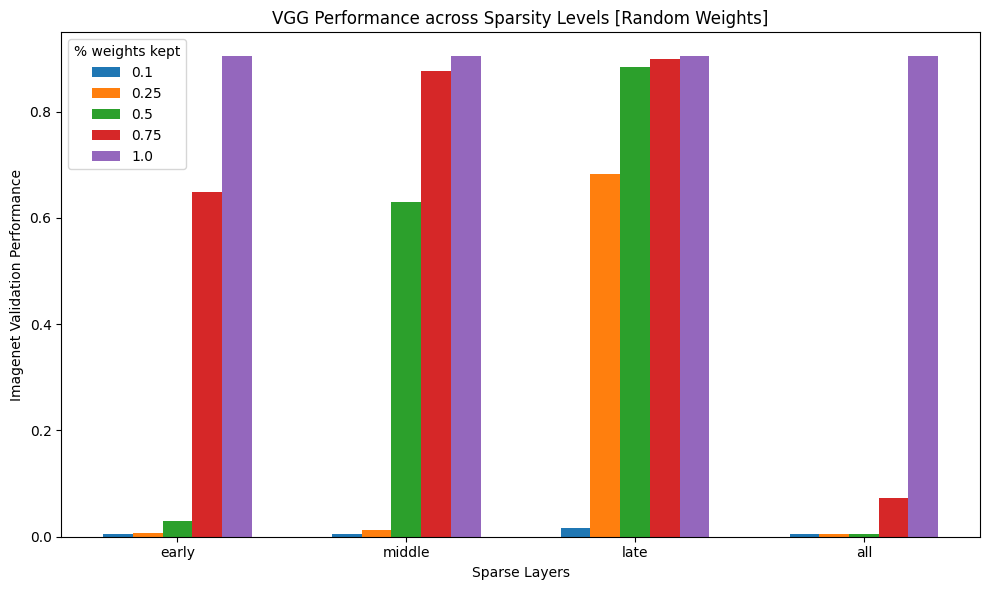

In [40]:
plt.figure(figsize=(12,10))

x = np.arange(len(vgg_accs))
bar_width = 0.13  # spacing of bars inside each group

plt.figure(figsize=(10, 6))

# plot bars
for i, sparsity in enumerate(sparsity_vals):
    heights = [vgg_accs[g][i] for g in vgg_accs.keys()]
    plt.bar(x + i * bar_width, heights, width=bar_width, label=f"{sparsity}")


plt.xticks(x + bar_width * (len(sparsity_vals) - 1) / 2, vgg_accs.keys())
plt.ylabel("Imagenet Validation Performance")
plt.xlabel("Sparse Layers")
plt.title("VGG Performance across Sparsity Levels [Random Weights]")
plt.legend(title="% weights kept")

plt.tight_layout()
plt.show()


In [49]:
# same with IT pred

vgg_it_pred = {}
for sl in sparse_layers:
    vgg_it_pred[sl] = []
    for k in sparsity_vals:
        path = f'./expt_results/random_features/{sl}_layers/predictivity/trained_sparsity_{k:.2f}.csv'
        df = pd.read_csv(path)
        vgg_it_pred[sl].append(float(df.iloc[0,22]))
        
print(vgg_it_pred)
print(sparsity_vals)

{'early': [0.0252310025825929, 0.21168422479145, 0.2774494419082479, 0.3014415515774945, 0.2931584877937979], 'middle': [0.0736896917138258, 0.1950305535356736, 0.3115176237805412, 0.3031564313901985, 0.2931584877937979], 'late': [0.2825053252557929, 0.3030725266075234, 0.300828791302471, 0.2963345760326871, 0.2931584877937979], 'all': [0.0030992159288546, 0.0071368505383984, 0.0306955262744552, 0.2746478314811722, 0.2931584877937979]}
[0.1, 0.25, 0.5, 0.75, 1.0]


<Figure size 1200x1000 with 0 Axes>

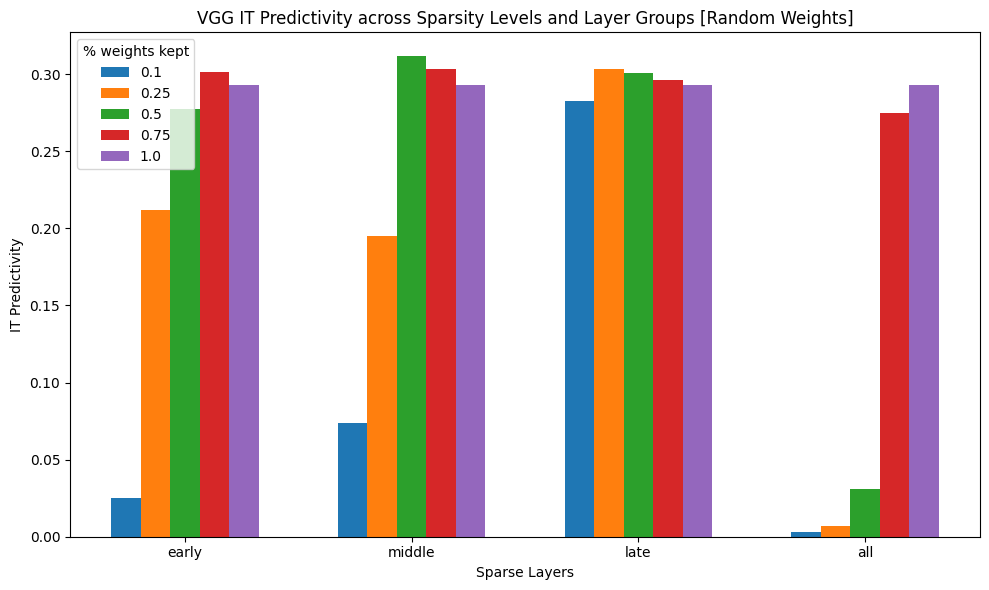

In [52]:
plt.figure(figsize=(12,10))

x = np.arange(len(vgg_accs))
bar_width = 0.13  # spacing of bars inside each group

plt.figure(figsize=(10, 6))

# plot bars
for i, sparsity in enumerate(sparsity_vals):
    heights = [vgg_it_pred[g][i] for g in vgg_it_pred.keys()]
    plt.bar(x + i * bar_width, heights, width=bar_width, label=f"{sparsity}")


plt.xticks(x + bar_width * (len(sparsity_vals) - 1) / 2, vgg_it_pred.keys())
plt.ylabel("IT Predictivity")
plt.xlabel("Sparse Layers")
plt.title("VGG IT Predictivity across Sparsity Levels and Layer Groups [Random Weights]")
plt.legend(title="% weights kept")

plt.tight_layout()
plt.show()


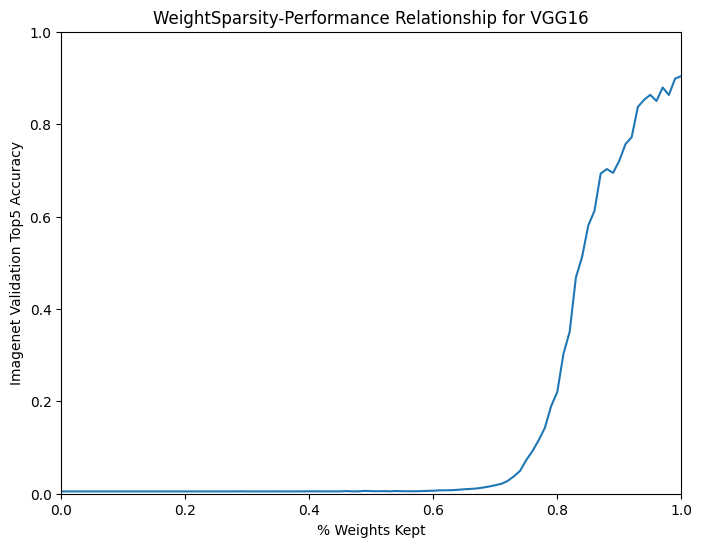

In [69]:
## fine-graind sparsity-performance relationship
path = f'./expt_results/random_weights/vgg16/all_layers/performance/finegrained_model_sparsity_performance.csv'
df = pd.read_csv(path)
model_accs = list(df.iloc[:, 2])
sparsity_vals = list(df.iloc[:, 0])


plt.figure(figsize=(8,6))
plt.plot(sparsity_vals, model_accs)
plt.ylabel("Imagenet Validation Top5 Accuracy")
plt.xlabel("% Weights Kept")
plt.ylim([0, 1])
plt.xlim([0, 1])

plt.title("WeightSparsity-Performance Relationship for VGG16")

plt.show()

### Generalisation to other architectures

In [12]:
arch_names = ["vgg16", "resnet18", "convnext_b", "vit_b_16"]
sparse_layers = ['early', 'middle', 'late', 'all']
sparsity_vals = None

model_accs = {}
for mn in arch_names:
    model_accs[mn] = {}
    for sl in sparse_layers:
        path = f'./expt_results/random_weights/{mn}/{sl}_layers/performance/full_model_sparsity_performance.csv'
        df = pd.read_csv(path)
        model_accs[mn][sl] = []
        if sparsity_vals is None:
            sparsity_vals = list(df.iloc[:,0])
        
        for i in range(len(sparsity_vals)):
            model_accs[mn][sl].append(float(df.iloc[i, 2]))
print(model_accs)
print(sparsity_vals)

{'vgg16': {'early': [0.00496, 0.00692, 0.02984, 0.64878, 0.90394], 'middle': [0.00466, 0.0126, 0.63034, 0.87674, 0.90394], 'late': [0.01622, 0.68204, 0.8838, 0.89944, 0.90394], 'all': [0.005, 0.005, 0.00558, 0.0729, 0.90394]}, 'resnet18': {'early': [0.00526, 0.00686, 0.01806, 0.25072, 0.89078], 'middle': [0.00602, 0.00776, 0.09268, 0.75338, 0.89078], 'late': [0.00758, 0.04602, 0.45642, 0.8362, 0.89078], 'all': [0.005, 0.005, 0.00496, 0.00824, 0.89078]}, 'convnext_b': {'early': [0.00506, 0.00496, 0.00746, 0.33488, 0.96732], 'middle': [0.94432, 0.94456, 0.951, 0.96258, 0.96732], 'late': [0.07836, 0.29624, 0.82094, 0.96476, 0.96732], 'all': [0.005, 0.00516, 0.0049, 0.02322, 0.96732]}, 'vit_b_16': {'early': [0.00572, 0.00698, 0.03346, 0.51788, 0.95318], 'middle': [0.5741, 0.31446, 0.6483, 0.92088, 0.95318], 'late': [0.87036, 0.85042, 0.88746, 0.93602, 0.95318], 'all': [0.005, 0.005, 0.00566, 0.0489, 0.95318]}}
[0.1, 0.25, 0.5, 0.75, 1.0]


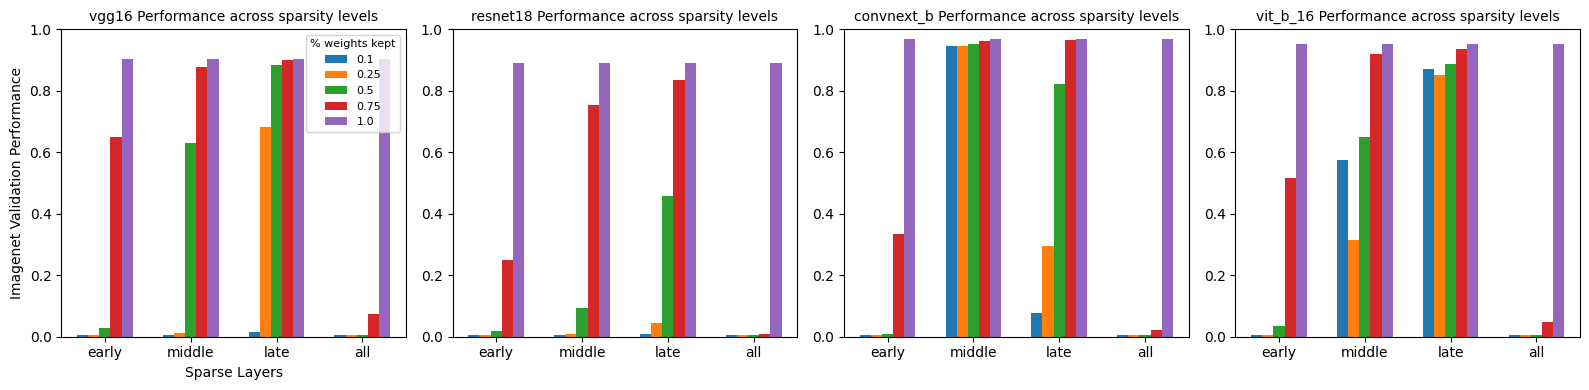

In [51]:
plt.figure(figsize=(16,4))

for i, mn in enumerate(arch_names):
    plt.subplot(1,len(arch_names),i+1)
    x = np.arange(len(model_accs[mn]))
    bar_width = 0.13  # spacing of bars inside each group
    # plot bars
    for j, sparsity in enumerate(sparsity_vals):
        heights = [model_accs[mn][g][j] for g in model_accs[mn].keys()]
        plt.bar(x + j * bar_width, heights, width=bar_width, label=f"{sparsity}")
    
    
    plt.xticks(x + bar_width * (len(sparsity_vals) - 1) / 2, model_accs[mn].keys())
    if i==0:
        plt.ylabel("Imagenet Validation Performance")
        plt.xlabel("Sparse Layers")
        plt.legend(title="% weights kept", fontsize=8, title_fontsize=8, loc='best')
    
    plt.title(f"{mn} Performance across sparsity levels", fontsize=10)
    plt.ylim([0,1])
    

plt.tight_layout()
plt.show()

### Layer-Type Analysis

In [2]:
# ViT
sparse_layers = ['mlp', 'attn_in', 'attn_out', 'all'] # 'mlpc' for matched num of MLP layers (12), 'mlp' for all MLP layers (24)
sparsity_vals = None
model_accs = {}

for sl in sparse_layers:
    path = f'./expt_results/random_weights/vit_b_16/all_layers/performance/{sl}_layers_sparsity_performance.csv'
    df = pd.read_csv(path)
    model_accs[sl] = []
    if sparsity_vals is None:
        sparsity_vals = list(df.iloc[:,0])
    
    for i in range(len(sparsity_vals)):
        model_accs[sl].append(float(df.iloc[i, 1]))
        
print(model_accs)
print(sparsity_vals)

{'mlpc': [0.00102, 0.001, 0.00102, 0.19744, 0.81068], 'attn_in': [0.00212, 0.00574, 0.08808, 0.64682, 0.81068], 'attn_out': [0.00306, 0.0932, 0.6586, 0.7927, 0.81068], 'all': [0.001, 0.001, 0.0012, 0.01634, 0.81068]}
[0.1, 0.25, 0.5, 0.75, 1.0]


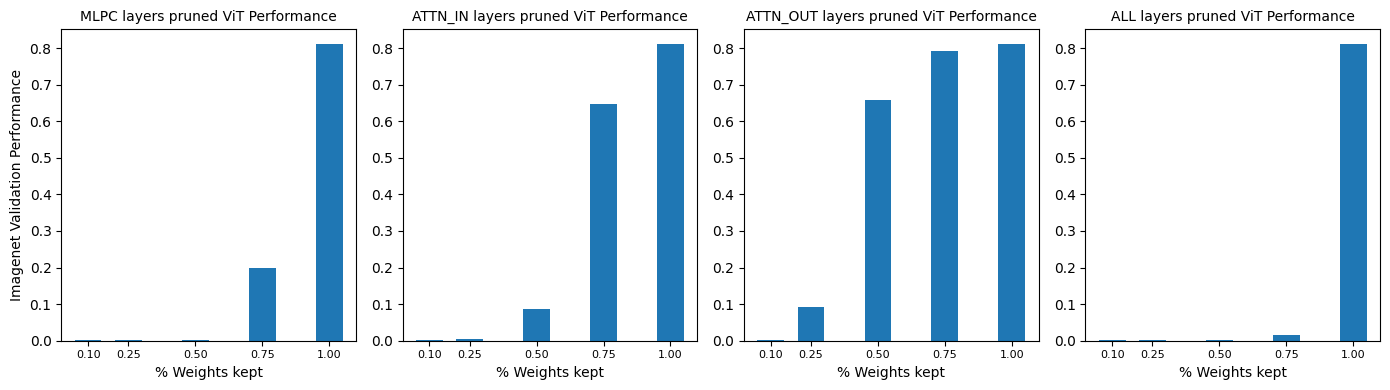

In [3]:
plt.figure(figsize=(14,4))

for i, sl in enumerate(sparse_layers):
    plt.subplot(1,len(model_accs.keys()), i+1)

    plt.bar(sparsity_vals, model_accs[sl], width=0.1)
    plt.xticks(sparsity_vals, fontsize=8)

    if i == 0:
        plt.ylabel("Imagenet Validation Performance")
    plt.xlabel("% Weights kept")
    plt.title(f"{sl.upper()} layers pruned ViT Performance", fontsize=10)
    # plt.legend(title="% weights kept")

plt.tight_layout()
plt.show()

In [70]:
# vgg
sparse_layers = ['conv', 'linear', 'all']
sparsity_vals = None
model_accs = {}

for sl in sparse_layers:
    path = f'./expt_results/random_weights/vgg16/all_layers/performance/{sl}_layers_sparsity_performance.csv'
    df = pd.read_csv(path)
    model_accs[sl] = []
    if sparsity_vals is None:
        sparsity_vals = list(df.iloc[:,0])
    
    for i in range(len(sparsity_vals)):
        model_accs[sl].append(float(df.iloc[i, 1]))
        
print(model_accs)
print(sparsity_vals)

{'conv': [0.001, 0.001, 0.00096, 0.02014, 0.71582], 'linear': [0.37146, 0.67944, 0.70778, 0.71378, 0.71582], 'all': [0.001, 0.001, 0.00102, 0.01624, 0.71582]}
[0.1, 0.25, 0.5, 0.75, 1.0]


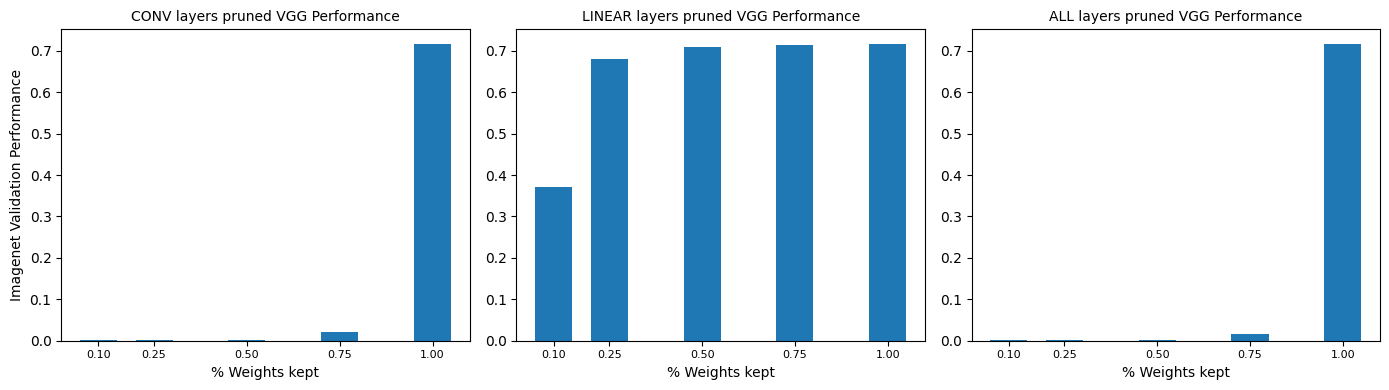

In [72]:
plt.figure(figsize=(14,4))

for i, sl in enumerate(sparse_layers):
    plt.subplot(1,len(model_accs.keys()), i+1)

    plt.bar(sparsity_vals, model_accs[sl], width=0.1)
    plt.xticks(sparsity_vals, fontsize=8)

    if i == 0:
        plt.ylabel("Imagenet Validation Performance")
    plt.xlabel("% Weights kept")
    plt.title(f"{sl.upper()} layers pruned VGG Performance", fontsize=10)
    # plt.legend(title="% weights kept")

plt.tight_layout()
plt.show()

## Random Sparse Units

In [ ]:
sparsified_layers="all"
random_predictivity_path = f'./expt_results/random_units/{sparsified_layers}_layers/predictivity'
inits = ['kaiming_n', 'trained']
result_files =  os.listdir(f"{random_predictivity_path}/")

pattern = re.compile(r"sparsity_(\d+\.\d+)")
sparsity_values = sorted({float(pattern.search(f).group(1)) for f in result_files})

vgg_model = init_vgg()
vgg_layer_names = get_layer_names(vgg_model)
nice_layer_names = get_nice_layer_names(vgg_model, vgg_layer_names)

# Predictivity of last n layers across different sparsities

fig = plt.figure(figsize=(18,7))
for ri, rn in enumerate(inits):
    if rn == "trained":
        line_color = "tab:orange"
    else:
        line_color = "tab:blue"
    plt.subplot(1,2,ri+1)
    plt.title(f"{rn if rn == "trained" else "untrained"}")
    for ki, k in enumerate(sparsity_values):
        
        pred_data = pd.read_csv(f'{random_predictivity_path}/{rn}_sparsity_{k:.2f}.csv', index_col=0).to_numpy() # (n_seeds, n_layers)
        y_vals = pred_data[0,:]
        plt.plot(nice_layer_names, y_vals, label=f"{k:.2f}")
        plt.xticks(rotation=45, ha='right')
        plt.ylim([0, 0.5])

        plt.legend(title="% Weights kept", fontsize=8, title_fontsize=9)

plt.suptitle(f"Layerwise Evolution of IT Predictivity with varying weight sparsity [Random Unit]")
plt.tight_layout()
plt.show()

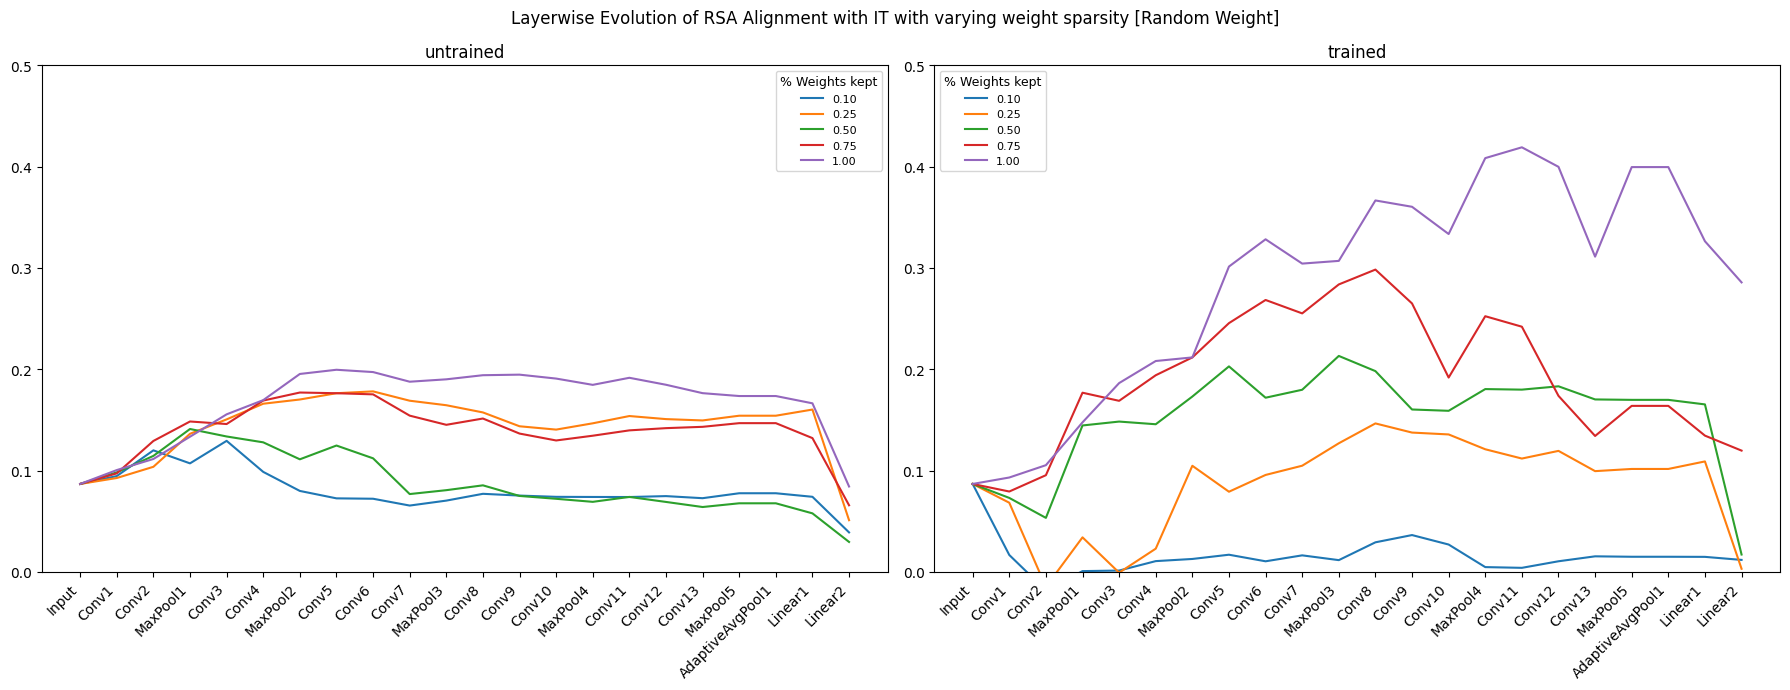

In [27]:
# RSA of last n layers across different sparsities
random_rsa_path = f'./expt_results/random_units/{sparsified_layers}_layers/rsa'
fig = plt.figure(figsize=(18,7))
for ri, rn in enumerate(inits):
    if rn == "trained":
        line_color = "tab:orange"
    else:
        line_color = "tab:blue"
    plt.subplot(1,2,ri+1)
    plt.title(f"{rn if rn == "trained" else "untrained"}")
    for ki, k in enumerate(sparsity_values):
        
        rsa_data = pd.read_csv(f'{random_rsa_path}/{rn}_sparsity_{k:.2f}.csv', index_col=0).to_numpy() # (n_seeds, n_layers)
        y_vals = rsa_data[0,:]
        plt.plot(nice_layer_names, y_vals, label=f"{k:.2f}")
        plt.xticks(rotation=45, ha='right')
        plt.ylim([0, 0.5])

        plt.legend(title="% Weights kept", fontsize=8, title_fontsize=9)

plt.suptitle(f"Layerwise Evolution of RSA Alignment with IT with varying weight sparsity [Random Weight]")
plt.tight_layout()
plt.show()